In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [18]:
col_names=["pregnant","glucose","bp","skin","insulin","bmi","pedigree","age","label"]
pima=pd.read_csv("diabetes.csv",header=None,names=col_names)
df=pima.iloc[1:,:]
df

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
764,10,101,76,48,180,32.9,0.171,63,0
765,2,122,70,27,0,36.8,0.34,27,0
766,5,121,72,23,112,26.2,0.245,30,0
767,1,126,60,0,0,30.1,0.349,47,1


In [19]:
#Seleccion de las caracteristicas
feature_cols=["pregnant","insulin","bmi","age","glucose","bp","pedigree"]
X=df[feature_cols]
y=df.label


In [20]:
#Creación de las bases de entrenamiento y pruebas
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

#sag: Stochastic Average Gradient
#newton-cg: Newton
#liblinear: Library for large linear classification (Algoritmo ccordinante descent)
#saga: Variante del método sag
#lbfgs: Limited-memory Broyden-Fletcher-Goldfarb-Shanno Algorithm

## Regresión Logística son solucionador (Sag)

In [21]:
model = LogisticRegression(solver="sag")
clf = model.fit(X_train, y_train)

In [22]:
#Predicción de etiquetas de clase sobre datos de prueba
y_pred=model.predict(X_test)

#Impresión de coeficientes de la regresión de puntajes
print("Intercepto (Beta 0)",clf.intercept_)
print("Pesos de cada variable(Beta1,Beta2,....,Beta7)",clf.coef_)

Intercepto (Beta 0) [-0.01188944]
Pesos de cada variable(Beta1,Beta2,....,Beta7) [[ 0.05178722  0.00116469 -0.00937518 -0.00227093  0.01407484 -0.03084781
   0.00093136]]


In [23]:
# Evaluación de la precisión ddel módelo
score= model.score(X_test,y_test)
print("Score de presición",score)

Score de presición 0.6428571428571429


In [24]:
#Reporte de clasificación
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.89      0.76        99
           1       0.50      0.20      0.29        55

    accuracy                           0.64       154
   macro avg       0.58      0.54      0.52       154
weighted avg       0.61      0.64      0.59       154



## Regresión Logística son solucionador (Newton)

In [25]:
model= LogisticRegression(solver="newton-cg")
clf = model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print("Intercepto (Beta0): ",clf.intercept_)
print("Pesos (Betas): ",clf.coef_)
print("------------------------------------------------------")
score=model.score(X_test, y_test)
print("Presición global: ",score)
print("------------------------------------------------------")
print(classification_report(y_test,y_pred))

Intercepto (Beta0):  [-8.0901646]
Pesos (Betas):  [[ 0.12708994 -0.00095867  0.08544587  0.01165706  0.03653173 -0.01510538
   0.63048471]]
------------------------------------------------------
Presición global:  0.7727272727272727
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.90      0.84        99
           1       0.75      0.55      0.63        55

    accuracy                           0.77       154
   macro avg       0.77      0.72      0.73       154
weighted avg       0.77      0.77      0.76       154



## Regresión Logística son solucionador (liblinear)

In [26]:
model= LogisticRegression(solver="liblinear")
clf = model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print("Intercepto (Beta0): ",clf.intercept_)
print("Pesos (Betas): ",clf.coef_)
print("------------------------------------------------------")
score=model.score(X_test, y_test)
print("Presición global: ",score)
print("------------------------------------------------------")
print(classification_report(y_test,y_pred))

Intercepto (Beta0):  [-5.37993555]
Pesos (Betas):  [[ 1.18842180e-01 -3.17153980e-04  5.28246540e-02  3.80487479e-03
   2.87924885e-02 -1.90994375e-02  4.74843055e-01]]
------------------------------------------------------
Presición global:  0.7662337662337663
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.90      0.83        99
           1       0.74      0.53      0.62        55

    accuracy                           0.77       154
   macro avg       0.76      0.71      0.72       154
weighted avg       0.76      0.77      0.76       154



## Regresión Logística son solucionador (saga)

In [27]:
model= LogisticRegression(solver="saga")
clf = model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print("Intercepto (Beta0): ",clf.intercept_)
print("Pesos (Betas): ",clf.coef_)
print("------------------------------------------------------")
score=model.score(X_test, y_test)
print("Presición global: ",score)
print("------------------------------------------------------")
print(classification_report(y_test,y_pred))

Intercepto (Beta0):  [-0.00608968]
Pesos (Betas):  [[ 0.02987893  0.00115514 -0.00946196  0.0009909   0.01388483 -0.03083973
   0.00049254]]
------------------------------------------------------
Presición global:  0.6493506493506493
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.67      0.89      0.77        99
           1       0.52      0.22      0.31        55

    accuracy                           0.65       154
   macro avg       0.60      0.55      0.54       154
weighted avg       0.62      0.65      0.60       154



## Regresión Logística son solucionador (lbfgs)

In [28]:
model= LogisticRegression(solver="lbfgs")
clf = model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print("Intercepto (Beta0): ",clf.intercept_)
print("Pesos (Betas): ",clf.coef_)
print("------------------------------------------------------")
score=model.score(X_test, y_test)
print("Presición global: ",score)
print("------------------------------------------------------")
print(classification_report(y_test,y_pred))

Intercepto (Beta0):  [-8.10384281]
Pesos (Betas):  [[ 0.12715757 -0.00096267  0.08559419  0.01168206  0.0365708  -0.01508661
   0.63353104]]
------------------------------------------------------
Presición global:  0.7727272727272727
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.90      0.84        99
           1       0.75      0.55      0.63        55

    accuracy                           0.77       154
   macro avg       0.77      0.72      0.73       154
weighted avg       0.77      0.77      0.76       154



In [29]:
# Predicción de probabilidades para casos particulares

y_pred_probs = clf.predict_proba(X_test)[:,1]
y_pred_probs[0:5]

array([0.4365066 , 0.31967279, 0.15787836, 0.04340145, 0.19968326])

In [30]:
y_test[0:5]

286    0
102    0
582    0
353    0
727    0
Name: label, dtype: object

In [32]:
y_test= [int(numeric_string) for numeric_string in y_test]
y_test[0:5]

[0, 0, 0, 0, 0]

In [36]:
y_pred_probs = np.round(y_pred_probs,0)
y_pred_probs[0:5]

array([0., 0., 0., 0., 0.])

In [37]:
#Grafica de la curva ROC y cáculo del área bajo ella
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#fpr= false positive rate
#tpr= true positive rate
#thresholds = límites para valores de p

fpr,tpr,thresholds = roc_curve(y_test, y_pred_probs)
auc = roc_auc_score(y_test, y_pred_probs)


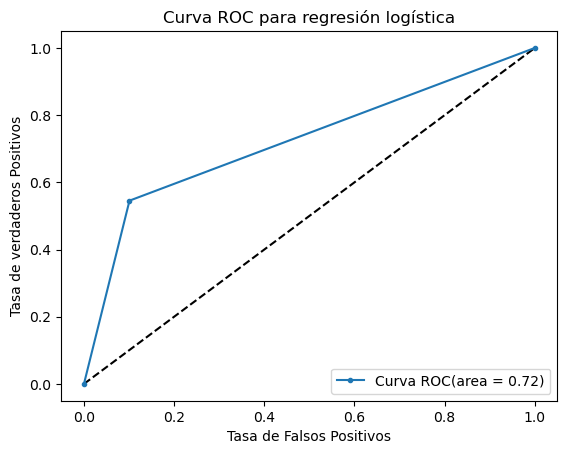

In [38]:
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,marker=".",label="Curva ROC(area = %0.2f)"%auc)
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de verdaderos Positivos")
plt.title("Curva ROC para regresión logística")
plt.legend(loc="lower right")